Graph algorithms are computational procedures that operate on graphs, which are mathematical structures used to model pairwise relations between objects. Graphs consist of nodes (or vertices) and edges (or arcs). These algorithms are used across many fields, such as computer networks, social media analysis, logistics, and biology.

## Types of Graphs
Directed vs. Undirected: In directed graphs, edges have directions.

Weighted vs. Unweighted: Weighted graphs have edges with weights (cost, distance, etc.).

Cyclic vs. Acyclic: A cyclic graph contains cycles; an acyclic one doesn't.

Connected vs. Disconnected: A connected graph has a path between every pair of nodes.

## Common Graph Algorithms
### 1. Traversal Algorithms
Depth-First Search (DFS): Explores as far as possible along a branch before backtracking.

Breadth-First Search (BFS): Explores all neighbors of a node before going deeper.

### 2. Shortest Path Algorithms
Dijkstra’s Algorithm: Finds the shortest path in weighted graphs with non-negative weights.

Bellman-Ford Algorithm: Handles negative weights.

Floyd-Warshall Algorithm: Computes all-pairs shortest paths.

A*: Heuristic-based algorithm for shortest path, often used in games and maps.

### 3. Minimum Spanning Tree (MST) Algorithms
Prim’s Algorithm: Builds the MST by adding the smallest edge from the tree.

Kruskal’s Algorithm: Builds the MST by sorting edges and connecting components.

### 4. Topological Sorting
For Directed Acyclic Graphs (DAGs), used in scheduling, course prerequisite resolution, etc.

### 5. Cycle Detection
Important for deadlock detection, dependency resolution, etc.

### 6. Connectivity and Components
Union-Find (Disjoint Set Union): Used in Kruskal’s algorithm and dynamic connectivity.

### 7. Network Flow Algorithms
Ford-Fulkerson / Edmonds-Karp: Compute maximum flow in a flow network.

### 8. Graph Coloring
Assign colors to nodes so that no adjacent nodes share the same color; used in register allocation, map coloring, etc.

## Graph Data Strucutre

![](https://i.imgur.com/xkgMnwx.png)


### Adjacency Lists

![](https://i.imgur.com/rgMwkIW.png)




### Adjacency Matrix

![](https://i.imgur.com/oswYKTW.png)



### Q. Create a class to represent a graph as an adjacency list in python.

In [50]:
# [[] for x in range(10)]
# This creates 10 independent inner lists.

a = [[] for x in range(10)]
a[0].append(1)
print(a)

# Each [] is a separate list object in memory.

[[1], [], [], [], [], [], [], [], [], []]


In [51]:
# ⚠️ [[]] * 10
# This creates 10 references to the same list.

b = [[]] * 10
b[0].append(1)
print(b)

# All 10 elements in the list are pointing to the same list object. So modifying one modifies them all.

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


In [52]:
num_nodes = 5
edges = [(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)]


In [53]:
## class to represent a graph as adjacency list
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        for n1, n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)

In [54]:
graph1 = Graph(num_nodes, edges)
graph1.data

[[1, 4], [0, 2, 3, 4], [1, 3], [1, 2, 4], [0, 1, 3]]

In [55]:
## for better visualization
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        for n1, n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)

    def __repr__(self):
        return "\n".join(["{}:{}".format(n, neighbors) for n, neighbors in enumerate(self.data)])
    
    def __str__(self):
        return self.__repr__()

In [56]:
graph1 = Graph(num_nodes, edges)
print(graph1)

0:[1, 4]
1:[0, 2, 3, 4]
2:[1, 3]
3:[1, 2, 4]
4:[0, 1, 3]


In [57]:
## another way to convert array of edges to adjacency list

from collections import defaultdict

D = defaultdict(list)

for u,v in edges:
    D[u].append(v)

    # if the graph is undirected, also use:
    D[v].append(u)

print(D)

defaultdict(<class 'list'>, {0: [1, 4], 1: [0, 2, 3, 4], 4: [0, 1, 3], 2: [1, 3], 3: [1, 2, 4]})


### Q. Represent a graph as an adjacency matrix in python.

In [58]:
AM = []
for _ in range(num_nodes):
    AM.append([0]*num_nodes)

for u, v in edges:
    AM[u][v] = 1

    ## for undirected graph, also use below line of code
    AM[v][u] = 1

AM

[[0, 1, 0, 0, 1],
 [1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0],
 [0, 1, 1, 0, 1],
 [1, 1, 0, 1, 0]]

## Graph Traversal

### Breadth First Search
Breadth-First Search (BFS) is a fundamental graph traversal algorithm used to explore nodes and edges of a graph in the order of their distance from the starting point (in terms of the number of edges).

### 🧠 Key Idea
BFS visits all neighbors of a node before moving to their neighbors, which makes it ideal for finding the shortest path in an unweighted graph.

### ✅ BFS Characteristics
Uses a queue (FIFO) for managing nodes.

Guarantees the shortest path in terms of edge count.

Works for both directed and undirected graphs.

Can be used to check connectivity, find shortest paths, and detect cycles in undirected graphs.

<img src="https://cdn.programiz.com/sites/tutorial2program/files/queue-implementation.png" width="400">

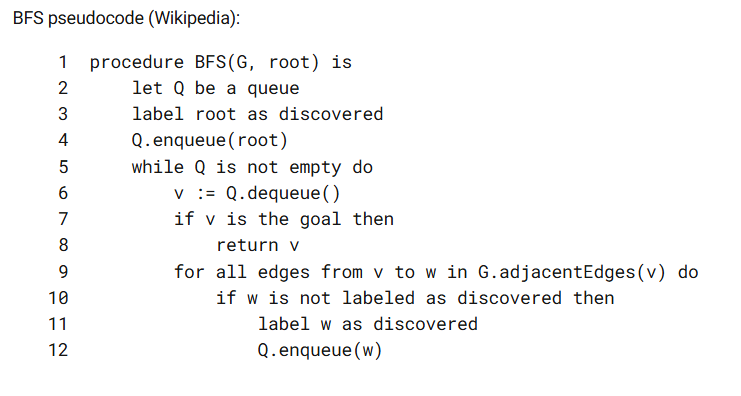

In [59]:
## function to traverse all nodes using bfs given root
def bfs(graph, root):
    queue = []  # This holds nodes to visit
    discovered = [False] * len(graph.data)  # Track visited nodes
    distance = [None] * len(graph.data)
    parent = [None] * len(graph.data)

    discovered[root] = True  # Mark the root as discovered
    distance[root] = 0
    queue.append(root)  # Start with the root node

    idx = 0  # Acts like the front of the queue

    while idx < len(queue):
        current = queue[idx]
        idx += 1

        # Visit all neighbors of the current node
        for neighbor in graph.data[current]:
            if not discovered[neighbor]:
                distance[neighbor] = 1 + distance[current]
                parent[neighbor] = current
                discovered[neighbor] = True
                queue.append(neighbor)

    return queue, distance, parent



In [60]:
bfs(graph1, 3)

([3, 1, 2, 4, 0], [2, 1, 1, 0, 1], [1, 3, 3, None, 3])

In [61]:
## program to check if all nodes in a graph are connected
def bfs_check(graph, root, num_nodes):
    queue = []
    visited = [False] * len(graph.data)

    visited[root] = True
    queue.append(root)
    idx = 0

    while idx < len(queue):
        #deque
        current = queue[idx]
        idx += 1

        # visit all neighbors of the current node
        for neighbor in graph.data[current]:
            if not visited[neighbor]:
                visited[neighbor] = True
                queue.append(neighbor)

    if len(queue) != num_nodes:
        print("All nodes in this graph are not connected")
    else:
        print("All noded in this graph are connected.")


In [62]:
bfs_check(graph1, 3, num_nodes)

All noded in this graph are connected.


In [67]:
## another program for bfs
from collections import deque

def bfs_2(graph, root):
    visited = set()
    visited.add(root)
    queue = deque()
    queue.append(root)

    while queue:
        node = queue.popleft()
        print(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

In [68]:
bfs_2(D, 0)

0
1
4
2
3
